<a href="https://colab.research.google.com/github/choy-qi-hui/dsa3101-group2/blob/Group-A/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1: Calculate customer churn rates and identify at-risk customers

## Importing libraries and data

In [ ]:
import csv
import math
import random
import numpy as np
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import plotly.express as px
import time
import random
from scipy.stats import beta

In [ ]:
file_id = '1EI8FuKQ5Hho_hfFADLWh4wJ2FFSy8vZS'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'purchases_final_PLEASE_TY.csv'
gdown.download(url, output, quiet=False)

file_id = '1H695wq_TVs-x-7UNirY9--05aFb5MD-0'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'q2_customers.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1EI8FuKQ5Hho_hfFADLWh4wJ2FFSy8vZS
From (redirected): https://drive.google.com/uc?id=1EI8FuKQ5Hho_hfFADLWh4wJ2FFSy8vZS&confirm=t&uuid=0bb9e5ae-a80d-470f-862a-c6cdc6359f20
To: /content/purchases_final_PLEASE_TY.csv
100%|██████████| 272M/272M [00:04<00:00, 55.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1H695wq_TVs-x-7UNirY9--05aFb5MD-0
To: /content/q2_customers.csv
100%|██████████| 1.02M/1.02M [00:00<00:00, 61.0MB/s]


'q2_customers.csv'

In [ ]:
customers = pd.read_csv('q2_customers.csv')
customers.head()

,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,...,Pct Discount,Category,Cat_Urgency,Cat_Impulse,Cat_Indecisive,Cat_Category,Cat_Discount,Cat_Engagement,Cat_High_Value_F,Cat_High_Value_M
0,R_03aEbghUILs9NxD,1,1,0.000000,0.037819,0.000000,0.000000,0.000000,0.000000,1.0,...,0.562500,NaN,0,1,0,0,1,1,0,0
1,R_06RZP9pS7kONINr,1,1,0.073157,0.028239,0.000000,0.050699,0.000000,0.030436,1.0,...,0.458128,NaN,0,0,0,0,1,1,0,1
2,R_085qq7w0pkhowox,1,1,0.000000,0.000000,0.000000,0.000000,0.065627,0.000000,1.0,...,0.454861,NaN,0,0,0,0,1,1,0,0
3,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.072766,0.000000,0.000000,0.000000,1.0,...,0.382022,NaN,0,1,0,0,0,1,0,1
4,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.000000,0.036028,0.000000,0.000000,1.0,...,0.380952,NaN,0,1,0,0,0,1,0,0


In [ ]:
purchases = pd.read_csv('purchases_final_PLEASE_TY.csv')
purchases.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Survey ResponseID,Category,Prime,Discounts,Express Shipping
0,2018-12-04,7.98,1,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,R_01vNIayewjIIKMF,Electronics,1,0.00,1
1,2018-12-22,13.99,1,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,R_01vNIayewjIIKMF,Electronics,1,0.00,1
2,2018-12-24,8.99,1,NJ,NaN,B078JZTFN3,R_01vNIayewjIIKMF,NaN,1,0.00,1
3,2018-12-25,10.45,1,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,R_01vNIayewjIIKMF,Kitchen & Dining,1,0.05,1
4,2018-12-25,10.00,1,NJ,Proraso Shaving Cream for Men,B00837ZOI0,R_01vNIayewjIIKMF,Beauty & Personal Care,1,0.05,1


## RFM

In [ ]:
def rfm(purchases,customers):
  customers['RFM'] = customers['RFM'].astype(str)
  customers['Churn Risk'] = customers['RFM'].str[0].apply(lambda x: "Active" if x == "3" else ("At risk" if x == "2" else "Churned"))
  return(customers)
print(customers.columns)

Index(['Survey ResponseID', 'Prime', 'Free Trial', 'Email CTC',
       'Display Ad CTC', 'Video Ad CTC', 'Search Engine Ad CTC',
       'Social Media Ad CTC', 'Average CTC', 'Express Shipping',
       'Cart Abandonment Rate', 'Check Review', 'Refund rate', 'Time in Cart',
       'Time on Page', 'RFM', 'Recency_category', 'Frequency_category',
       'Monetary_category', 'Pct Discount', 'Category', 'Cat_Urgency',
       'Cat_Impulse', 'Cat_Indecisive', 'Cat_Category', 'Cat_Discount',
       'Cat_Engagement', 'Cat_High_Value_F', 'Cat_High_Value_M'],
      dtype='object')


In [ ]:
#urgency
customers_urgency = customers[customers['Cat_Urgency'] == 1]
trans_urgency = pd.merge(customers_urgency, purchases, on='Survey ResponseID', how='left')
rfm_urgency = rfm(trans_urgency, customers_urgency)

#impulse
customers_impulse = customers[customers['Cat_Impulse'] == 1]
trans_impulse = pd.merge(customers_impulse, purchases, on='Survey ResponseID', how='left')
rfm_impulse = rfm(trans_impulse, customers_impulse)

#indecisive
customers_indecisive = customers[customers['Cat_Indecisive'] == 1]
trans_indecisive = pd.merge(customers_indecisive, purchases, on='Survey ResponseID', how='left')
rfm_indecisive = rfm(trans_indecisive, customers_indecisive)

#category
customers_category = customers[customers["Cat_Category"] == 1]
trans_category = pd.merge(customers_category, purchases, on='Survey ResponseID', how='left')
rfm_category = rfm(trans_category, customers_category)

#engagement
customers_engagement = customers[customers["Cat_Engagement"] == 1]
trans_engagement = pd.merge(customers_engagement, purchases, on='Survey ResponseID', how='left')
rfm_engagement = rfm(trans_engagement, customers_engagement)

#high value F
customers_highvalf = customers[customers['Cat_High_Value_F'] == 1]
trans_highvalf = pd.merge(customers_highvalf, purchases, on='Survey ResponseID', how='left')
rfm_highvalf = rfm(trans_highvalf, customers_highvalf)

#high value M
customers_highvalm = customers[customers['Cat_High_Value_M'] == 1]
trans_highvalm = pd.merge(customers_highvalm, purchases, on='Survey ResponseID', how='left')
rfm_highvalm = rfm(trans_highvalm, customers_highvalm)

#discount
customers_discount = customers[customers["Cat_Discount"] == 1]
trans_discount = pd.merge(customers_discount, purchases, on='Survey ResponseID', how='left')
rfm_discount = rfm(trans_discount, customers_discount)

churn_segments_data = {
    'Segment': [],
    'Active': [],
    'At risk': [],
    'Churned': [],
    'Size': []
}

churn_segments = pd.DataFrame(churn_segments_data)

churn_segments.loc[len(churn_segments)] = ["Urgency", rfm_urgency[rfm_urgency['Churn Risk'] == "Active"].shape[0]/rfm_urgency.shape[0],
                                           rfm_urgency[rfm_urgency['Churn Risk'] == "At risk"].shape[0]/rfm_urgency.shape[0],
                                           rfm_urgency[rfm_urgency['Churn Risk'] == "Churned"].shape[0]/rfm_urgency.shape[0],
                                           rfm_urgency.shape[0]/customers.shape[0]]
churn_segments.loc[len(churn_segments)] = ["Impulse", rfm_impulse[rfm_impulse['Churn Risk'] == "Active"].shape[0]/rfm_impulse.shape[0],
                                           rfm_impulse[rfm_impulse['Churn Risk'] == "At risk"].shape[0]/rfm_impulse.shape[0],
                                           rfm_impulse[rfm_impulse['Churn Risk'] == "Churned"].shape[0]/rfm_impulse.shape[0],
                                           rfm_impulse.shape[0]/customers.shape[0]]
churn_segments.loc[len(churn_segments)] = ["Indecisive", rfm_indecisive[rfm_indecisive['Churn Risk'] == "Active"].shape[0]/rfm_indecisive.shape[0],
                                           rfm_indecisive[rfm_indecisive['Churn Risk'] == "At risk"].shape[0]/rfm_indecisive.shape[0],
                                           rfm_indecisive[rfm_indecisive['Churn Risk'] == "Churned"].shape[0]/rfm_indecisive.shape[0],
                                           rfm_indecisive.shape[0]/customers.shape[0]]
churn_segments.loc[len(churn_segments)] = ["Category", rfm_category[rfm_category['Churn Risk'] == "Active"].shape[0]/rfm_category.shape[0],
                                           rfm_category[rfm_category['Churn Risk'] == "At risk"].shape[0]/rfm_category.shape[0],
                                           rfm_category[rfm_category['Churn Risk'] == "Churned"].shape[0]/rfm_category.shape[0],
                                           rfm_category.shape[0]/customers.shape[0]]
churn_segments.loc[len(churn_segments)] = ["Engagement", rfm_engagement[rfm_engagement['Churn Risk'] == "Active"].shape[0]/rfm_engagement.shape[0],
                                           rfm_engagement[rfm_engagement['Churn Risk'] == "At risk"].shape[0]/rfm_engagement.shape[0],
                                           rfm_engagement[rfm_engagement['Churn Risk'] == "Churned"].shape[0]/rfm_engagement.shape[0],
                                           rfm_engagement.shape[0]/customers.shape[0]]
churn_segments.loc[len(churn_segments)] = ["High Value Frequency", rfm_highvalf[rfm_highvalf['Churn Risk'] == "Active"].shape[0]/rfm_highvalf.shape[0],
                                           rfm_highvalf[rfm_highvalf['Churn Risk'] == "At risk"].shape[0]/rfm_highvalf.shape[0],
                                           rfm_highvalf[rfm_highvalf['Churn Risk'] == "Churned"].shape[0]/rfm_highvalf.shape[0],
                                           rfm_highvalf.shape[0]/customers.shape[0]]
churn_segments.loc[len(churn_segments)] = ["High Value Monetary", rfm_highvalm[rfm_highvalm['Churn Risk'] == "Active"].shape[0]/rfm_highvalm.shape[0],
                                           rfm_highvalm[rfm_highvalm['Churn Risk'] == "At risk"].shape[0]/rfm_highvalm.shape[0],
                                           rfm_highvalm[rfm_highvalm['Churn Risk'] == "Churned"].shape[0]/rfm_highvalm.shape[0],
                                           rfm_highvalm.shape[0]/customers.shape[0]]
churn_segments.loc[len(churn_segments)] = ["Discount", rfm_discount[rfm_discount['Churn Risk'] == "Active"].shape[0]/rfm_discount.shape[0],
                                           rfm_discount[rfm_discount['Churn Risk'] == "At risk"].shape[0]/rfm_discount.shape[0],
                                           rfm_discount[rfm_discount['Churn Risk'] == "Churned"].shape[0]/rfm_discount.shape[0],
                                           rfm_discount.shape[0]/customers.shape[0]]

churn_segments.head(10)

<ipython-input-5-70e0616cf76a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['RFM'] = customers['RFM'].astype(str)
<ipython-input-5-70e0616cf76a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['Churn Risk'] = customers['RFM'].str[0].apply(lambda x: "Active" if x == "3" else ("At risk" if x == "2" else "Churned"))
<ipython-input-5-70e0616cf76a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Segment,Active,At risk,Churned,Size
0,Urgency,0.393855,0.329609,0.276536,0.072720
1,Impulse,0.654862,0.211355,0.133783,0.361365
2,Indecisive,0.553772,0.216693,0.229535,0.126549
3,Category,0.465517,0.290640,0.243842,0.082470
4,Engagement,0.609913,0.221432,0.168655,0.885233
5,High Value Frequency,0.895833,0.065833,0.038333,0.243754
6,High Value Monetary,0.579867,0.242097,0.178037,0.244160
7,Discount,0.642775,0.201445,0.155780,0.702823


In [ ]:
rfm_total = rfm(purchases, customers)

a = [rfm_total[rfm_total['Churn Risk'] == "Active"].shape[0]/rfm_total.shape[0], rfm_total[rfm_total['Churn Risk'] == "At risk"].shape[0]/rfm_total.shape[0], rfm_total[rfm_total['Churn Risk'] == "Churned"].shape[0]/rfm_total.shape[0]]
print(a)

[0.6049157018078407, 0.2208003250050782, 0.17428397318708105]


##Customer Lifetime Value

In [ ]:
print(customers.columns)

Index(['Survey ResponseID', 'Prime', 'Free Trial', 'Email CTC',
       'Display Ad CTC', 'Video Ad CTC', 'Search Engine Ad CTC',
       'Social Media Ad CTC', 'Average CTC', 'Express Shipping',
       'Cart Abandonment Rate', 'Check Review', 'Refund rate', 'Time in Cart',
       'Time on Page', 'RFM', 'Recency_category', 'Frequency_category',
       'Monetary_category', 'Pct Discount', 'Category', 'Cat_Urgency',
       'Cat_Impulse', 'Cat_Indecisive', 'Cat_Category', 'Cat_Discount',
       'Cat_Engagement', 'Cat_High_Value_F', 'Cat_High_Value_M', 'Churn Risk'],
      dtype='object')


In [ ]:
customers.iloc[:, :18].head()

,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,Cart Abandonment Rate,Check Review,Refund rate,Time in Cart,Time on Page,RFM,Recency_category,Frequency_category
0,R_03aEbghUILs9NxD,1,1,0.000000,0.037819,0.000000,0.000000,0.000000,0.000000,1.0,0.733693,0,0.243994,7.039021,0.469268,111,1,1
1,R_06RZP9pS7kONINr,1,1,0.073157,0.028239,0.000000,0.050699,0.000000,0.030436,1.0,0.709685,1,0.170417,45.151821,3.010121,323,3,2
2,R_085qq7w0pkhowox,1,1,0.000000,0.000000,0.000000,0.000000,0.065627,0.000000,1.0,0.719513,1,0.306721,19.751185,1.316746,322,3,2
3,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.072766,0.000000,0.000000,0.000000,1.0,0.645122,0,0.118960,13.694138,0.912943,223,2,2
4,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.000000,0.036028,0.000000,0.000000,1.0,0.832793,0,0.343723,2.544373,0.169625,212,2,1


# 2.2: Analyze the effectiveness of current retention strategies

## Loading libraries, reading in and filtering

In [ ]:
import csv
import math
import random
import numpy as np
import pandas as pd
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
file_id = '1EI8FuKQ5Hho_hfFADLWh4wJ2FFSy8vZS'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'purchases_final_PLEASE_TY.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1EI8FuKQ5Hho_hfFADLWh4wJ2FFSy8vZS
From (redirected): https://drive.google.com/uc?id=1EI8FuKQ5Hho_hfFADLWh4wJ2FFSy8vZS&confirm=t&uuid=f335aa72-39cb-43a8-9bea-2698bc7ea56e
To: /content/purchases_final_PLEASE_TY.csv
100%|██████████| 272M/272M [00:06<00:00, 40.6MB/s]


'purchases_final_PLEASE_TY.csv'

In [ ]:
purchases = pd.read_csv('purchases_final_PLEASE_TY.csv')
purchases = purchases[purchases['Order Date'] < '2022-11-01']
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'])
purchases['year'] = purchases['Order Date'].dt.year
purchases['day_of_year'] = purchases['Order Date'].dt.day_of_year

purchases

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Survey ResponseID,Category,Prime,Discounts,Express Shipping,year,day_of_year
0,2018-12-04,7.98,1,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,R_01vNIayewjIIKMF,Electronics,1,0.00,1,2018,338
1,2018-12-22,13.99,1,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,R_01vNIayewjIIKMF,Electronics,1,0.00,1,2018,356
2,2018-12-24,8.99,1,NJ,NaN,B078JZTFN3,R_01vNIayewjIIKMF,NaN,1,0.00,1,2018,358
3,2018-12-25,10.45,1,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,R_01vNIayewjIIKMF,Kitchen & Dining,1,0.05,1,2018,359
4,2018-12-25,10.00,1,NJ,Proraso Shaving Cream for Men,B00837ZOI0,R_01vNIayewjIIKMF,Beauty & Personal Care,1,0.05,1,2018,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530758,2019-06-07,16.80,1,MA,Cosrx Galactomyces 95 Tone Balancing Essence 1...,B00OZE57XW,R_zfqnsBzlOAKibzb,Beauty & Personal Care,1,0.00,1,2019,158
1530759,2019-08-14,7.97,1,MA,Coppertone Limited Edition ULTRA GUARD SPF 70 ...,B001TKOHMM,R_zfqnsBzlOAKibzb,Beauty & Personal Care,1,0.10,1,2019,226
1530760,2019-09-30,6.68,1,MA,Greeks and Their Gods,0807057932,R_zfqnsBzlOAKibzb,Books,1,0.00,1,2019,273
1530761,2019-10-13,16.90,1,MA,"MIZON Snail Repair Cream, Face Moisturizer wit...",B00AF63QQE,R_zfqnsBzlOAKibzb,Beauty & Personal Care,1,0.00,1,2019,286


## General trends in number of purchases

Number of purchases split by:
1. January to April
2. May to August
3. September to December

For better plot visibility

### January to April

### Sales in this date range:
1 Jan: New Year's Day  
3 - 13 Feb: Super Bowl  
14 Feb: Valentine's Day  
8 Mar: International Women's Day  
17 Mar: St. Patrick's Day  
10 - 20 Mar: March Madness  
25 Mar - 22 Apr: Easter  
1 Apr: April Fools' Day  


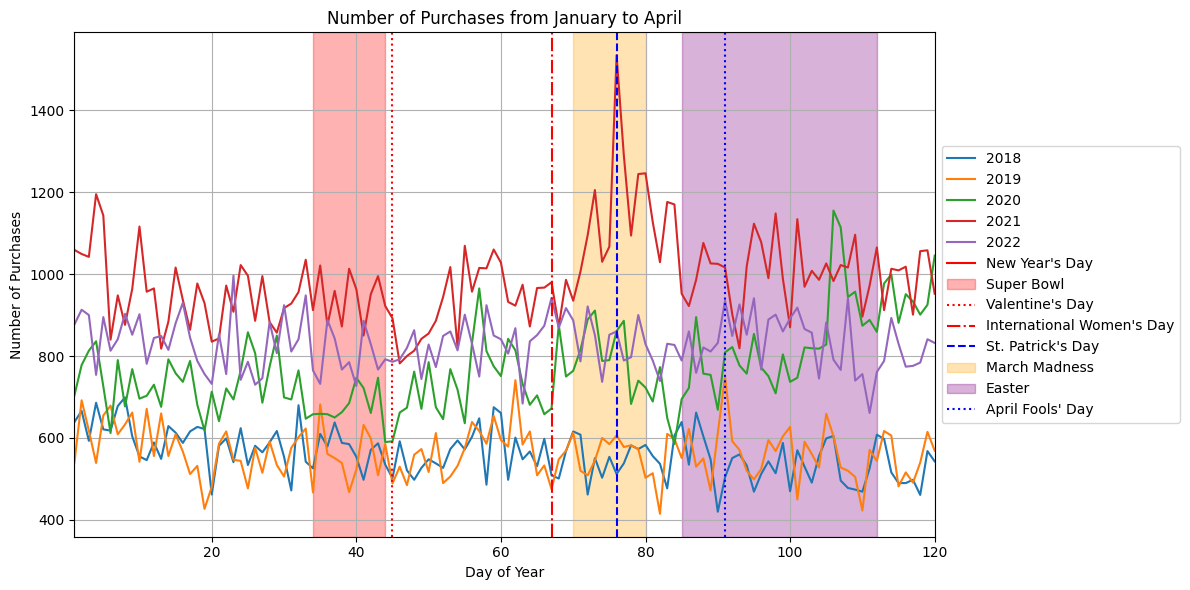

In [ ]:
plt.figure(figsize = (12, 6))

# Number of purchases from January to April
for year in purchases['year'].unique():
    yearly_data = purchases[purchases['year'] == year]
    purchase_counts = yearly_data.groupby('day_of_year').size()
    plt.plot(purchase_counts.index[purchase_counts.index <= 120], purchase_counts.values[purchase_counts.index <= 120], label = str(year))

# Vertical lines sale dates that do not vary by year
# Vertical highlighted regions for sale dates that varies by year
# 1 Jan: New Year's Day
plt.axvline(1, color = 'red', linestyle = '-', label = "New Year's Day")
# 3-13 Feb: Super Bowl
plt.axvspan(34, 44, color = 'red', alpha = 0.3, label = "Super Bowl")
# 14 Feb: Valentine's Day
plt.axvline(45, color = 'red', linestyle = ':', label = "Valentine's Day")
# 8 Mar: International Women's Day
plt.axvline(67, color = 'red', linestyle = '-.', label = "International Women's Day")
# 17 Mar: St. Patrick's Day
plt.axvline(76, color = 'blue', linestyle = '--', label = "St. Patrick's Day")
# 10 - 20 Mar: March Madness
plt.axvspan(70, 80, color = 'orange', alpha = 0.3, label = "March Madness")
# 25 Mar - 22 Apr: Easter
plt.axvspan(85, 112, color = 'purple', alpha = 0.3, label = "Easter")

# 1 Apr: April Fools' Day
plt.axvline(91, color = 'blue', linestyle = ':', label = "April Fools' Day")

# Easter exact sale date ranges
# plt.axvspan(85, 92, color = 'pink', alpha = 0.3, label = "Easter 2018")
# plt.axvspan(104, 112, color = 'pink', alpha = 0.3, label = "Easter 2019")
# plt.axvspan(96, 103, color = 'pink', alpha = 0.3, label = "Easter 2020")
# plt.axvspan(87, 95, color = 'pink', alpha = 0.3, label = "Easter 2021")
# plt.axvspan(100, 108, color = 'pink', alpha = 0.3, label = "Easter 2022")

plt.xlim(1, 120)
plt.title('Number of Purchases from January to April')
plt.xlabel('Day of Year')
plt.ylabel('Number of Purchases')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


1 Jan: New Year's Day
- Insights: No significant increase in number of purchases
- Plausible reasoning: From research, seems like people have already made their purchases at the end of the year from many event sales (Christmas Day, Last day of the year, etc.), hence may cause cooling off of purchasing items on New Year's Day. An article by Amazon encouraging sellers to focus on maximising year-end sales, shows the acknowledgement of the year end sale's importance: https://sell.amazon.com.sg/blog/maximize-sales-year-end
  
3-13 Feb: Super Bowl  
- Insights: No significant increase in number of purchases
- Plausible reasoning: Some spikes in number of purchases, but since the sale lasts for some time, hard to conclude since any spike in number of purchases during this event will be spread across a few days. Possible that some days garnered more purchases due to better sales on more desirable items.

14 Feb: Valentine's Day  
- Insights: No significant increase in number of purchases
- Plausible reasoning: Since it is likely that gifts bought on the day of the event itself will not arrive on the same day. It is more reasonable that the sale started earlier than 14 Feb, as can be seen by an increase right before Valentine's Day, followed by a significant dip on the day itself.

8 Mar: International Women's Day
- Insights: No significant increase in number of purchases
- Plausible reasoning: Not that big of an event for customers to consider purchasing items just because there is a sale

17 Mar: St. Patrick's Day
- Insights: No significant increase in number of purchases for 2018 and 2019. Significant increase in number of purchases for 2021, slight increase in number of purchases for 2020 and 2022.
- Plausible reasoning: Ramp up in sales from 2020 onwards. Abnormally large discounts in the 2021 event: https://www.buyandship.today/en/blog/2021/03/15/st-patricks-day-2021-sales-directory-deals-promo-codes/ after realisation of customers being receptive to St. Patrick's Day sales in 2020. Also coincides with March Madness sales.

10 - 20 Mar: March Madness  
- Insights: No significant increase in number of purchases for 2018 and 2019. Significant increase in number of purchases for 2021, some days of increased nunber of purchases for 2020 and 2022. There is a consistent increase in number of purchases on 13 - 14 March for years 2020, 2021, 2022.
- Plausible reasoning: March Madness only became a bigger event from 2021 onwards. 13 - 14 March may be the start date of St. Patrick's Day sales, as many event sales start at an earlier date. For a possible justification of general increase in number of purchases, it also coincides with other events that can have sales for specific items such as:  
St. Patrick's Day (17 March): Festive items  
Spring Equinox (20 March): Home, gardening, outdoor items  
National Nutrition Month (March): Health, wellness and fitness items  
National Women's History Month (March): History and educational items  
National Puppy Day: Pet supplies and accessory items  

25 Mar - 2 Apr: Easter  
- Insights: Some spikes in number of purchases within the range
- Plausible reasoning: Very large event period variation. Upon splitting by exact dates of Easter sale by each year (commented code), still could not find a consistent trend to support a conclude that any spike in purchases is due to Easter. Spikes can be due to other sales and events. Coincides with April Fools' Day.


1 Apr: April Fools' Day  
- Insights: Significant increase in number of purchases for 2018, 2019, 2020, 2022. No significant increase in number of purchases for 2021.
- Plausible reasoning: 2021 has seen significant number of increases in purchases in March, such as on St. Patrick's Day and March Madness. Customers have already purchases items they wanted in that sale, less people incentivised by any April Fools' Day sales.


### May to August

### Sales in this date range:
5 May: Cinco de Mayo  
8 - 13 May: Mother's Day  
25 - 31 May: Memorial Day  
9 June: Children's Day  
16 - 21 June: Father's Day  
21 - 22 June Amazon Prime Day 2021  
4 July: Fourth of July  
12 - 13 July: Amazon Prime Day 2022  
15 - 17 July: Amazon Prime Day 2018/ 2019  


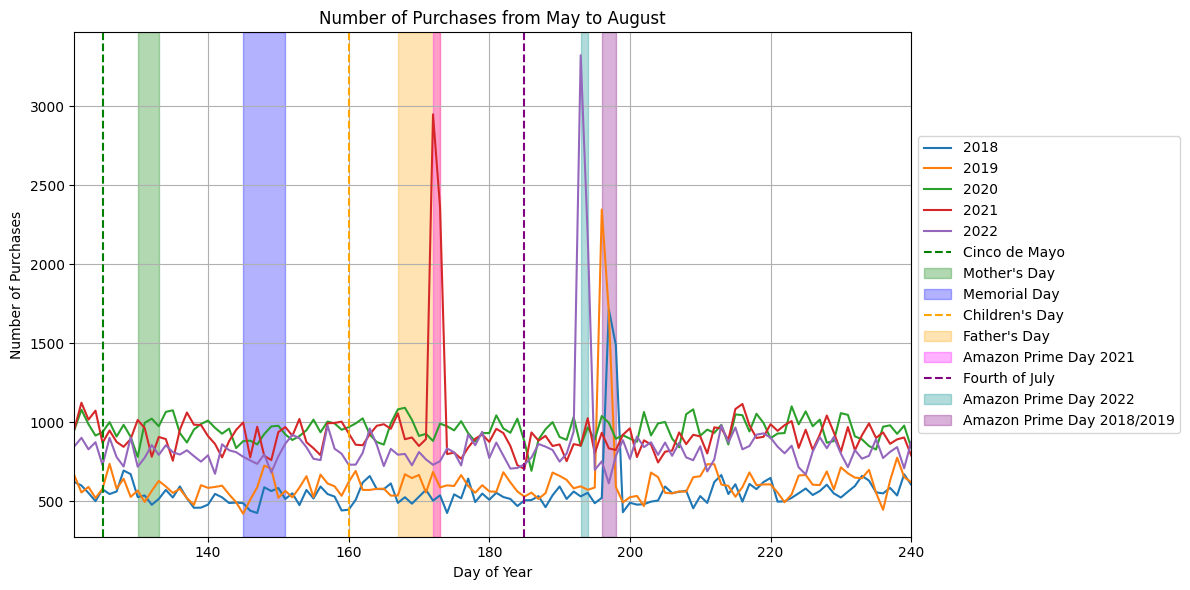

In [ ]:
plt.figure(figsize = (12, 6))

# Number of purchases from May to August
for year in purchases['year'].unique():
    yearly_data = purchases[purchases['year'] == year]
    purchase_counts = yearly_data.groupby('day_of_year').size()

    plt.plot(purchase_counts.index[(purchase_counts.index > 120) & (purchase_counts.index <= 240)],
                                   purchase_counts.values[(purchase_counts.index > 120) & (purchase_counts.index <= 240)], label = str(year))

# Vertical lines sale dates that do not vary by year
# Vertical highlighted regions for sale dates that varies by year
# 5 May: Cinco de Mayo
plt.axvline(125, color  ='green', linestyle = '--', label = "Cinco de Mayo")
# 8 - 13 May: Mother's Day
plt.axvspan(130, 133, color = 'green', alpha = 0.3, label = "Mother's Day")
# 25 - 31 May: Memorial Day
plt.axvspan(145, 151, color = 'blue', alpha = 0.3, label = "Memorial Day")
# 9 June: Children's Day
plt.axvline(160, color = 'orange', linestyle = '--', label = "Children's Day")
# 16 - 21 June: Father's Day
plt.axvspan(167, 173, color = 'orange', alpha = 0.3, label = "Father's Day")
# 21 - 22 June: Amazon Prime Day 2021
plt.axvspan(172, 173, color = 'magenta', alpha=0.3, label = "Amazon Prime Day 2021")
# 4 July: Fourth of July
plt.axvline(185, color = 'purple', linestyle = '--', label = "Fourth of July")
# 12 - 13 July: Amazon Prime Day 2022
plt.axvspan(193, 194, color = 'darkcyan', alpha=0.3, label = "Amazon Prime Day 2022")
# 15 - 17 July: Amazon Prime Day 2018/2019 (16 - 17 July for 2018, 15 - 16 July for 2019)
plt.axvspan(196, 198, color = 'purple', alpha=0.3, label = "Amazon Prime Day 2018/2019")

plt.xlim(121, 240)
plt.title('Number of Purchases from May to August')
plt.xlabel('Day of Year')
plt.ylabel('Number of Purchases')
plt.grid(True)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.tight_layout()
plt.show()


5 May: Cinco de Mayo  
- Insights: No significant increase in number of purchases
- Plausible reasoning: Not that big of an event for customers to consider purchasing items just because of sales

8 - 13 May: Mother's Day  
- Insights: No significant increase in number of purchases
- Plausible reasoning: Sales will be focused on Mother's Day gifts such as women's wellness goods and gift hampers, not every customer will be inclined to buy such items. Also can be due to gifts being bought in advance as sales will likely start earlier, which is harder to track.

25 - 31 May: Memorial Day  
- Insights: No significant increase in number of purchases
- Plausible reasoning: Not that big of an event for customers to consider purchasing items just because of sales.

9 June: Children's Day  
- Insights: No significant increase in number of purchases
- Plausible reasoning: Can be due to gifts being bought in advance as sales will likely start earlier, which is harder to track. Furthermore, sales will be focused on children's gifts and snacks, not everyone will be interested in such goods.

16 - 21 June: Father's Day  
- Insights: No significant increase in number of purchases, except for a significant spike in purchases on 21 June 2021.
- Plausible reasoning: Coincides with Amazon Prime Day 2021, which is a much larger sale. Unlikely it is due to Father's Day related item sales.

21 - 22 June Amazon Prime Day 2021
- Insights: Very significant increase in number of purchases in 2021
- Plausible reasoning: Amazon Prime Day is one of the biggest sales of the year, many people delayed their purchases waiting for this sale, many may also make impulse purchases as the deals are available on a first-come-first-served basis: https://www.cnbc.com/2021/06/18/amazon-prime-day-starts-soon-here-are-the-top-deals.html

4 July: Fourth of July  
- Insights: No significant increase in number of purchases
- Plausible reasoning: It is more of a celebratory event rather than an event that customers would keep in mind to look out for sales. Any items bought for celebrations on the 4th of July will almost certainly be bought before the day itself.

12 - 13 July: Amazon Prime Day 2022
- Insights: Largest increase in number of purchases in 2022 and in the whole dataset
- Plausible reasoning: Amazon Prime Day is one of the biggest sales of the year. The 2022 rendition was the biggest Prime Day event in Amazon's history: https://www.aboutamazon.sg/news/amazon-prime/the-history-of-prime-day-celebrating-9-years-of-amazons-biggest-deal-event

15 - 17 July: Amazon Prime Day 2018/2019 (16 - 17 July for 2018, 15 - 16 July for 2019)
- Insights: Significant increase in number of purchases in 2018 and 2019
- Plausible reasoning: Amazon Prime Day is one of the biggest sales of the year, similar trends to other years as stated above.





### September to December

### Sales in this date range:
1 Sep: Labor Day  
11 - 12 Oct: Amazon Prime Early Access Sale 2022 (Prime Big Deals Days)  
13 - 14 Oct: Amazon Prime Day 2020  
31 Oct: Halloween  
22-28 Nov: Thanksgiving  
23 Nov - 2nd Dec: Black Friday & Cyber Monday  
24 - 25 Dec: Christmas Eve & Christmas Day


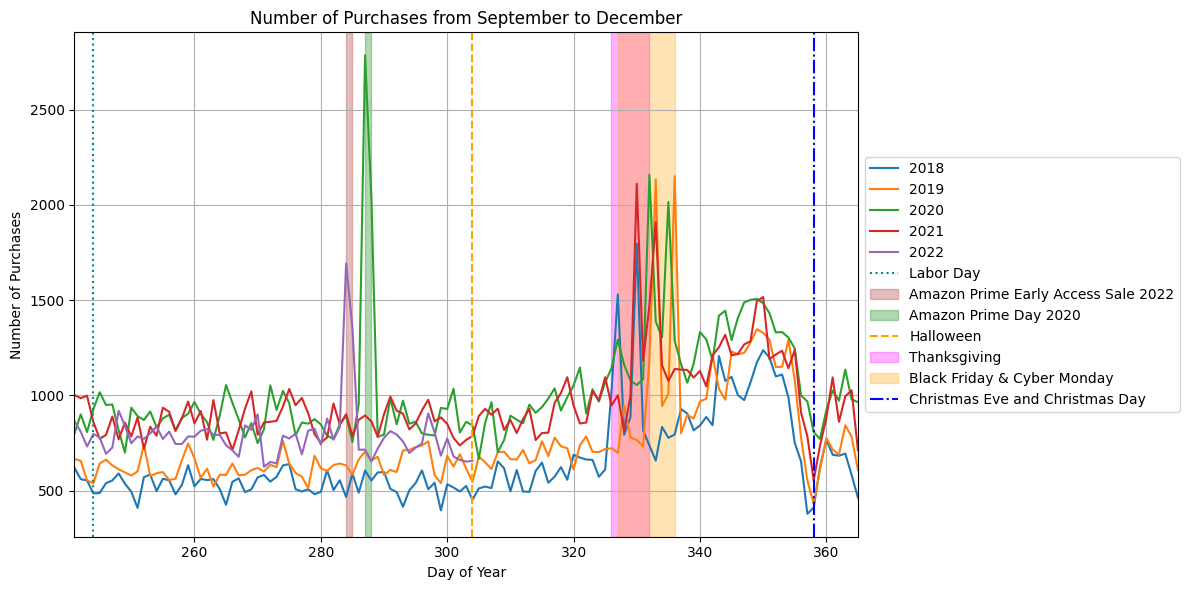

In [ ]:
plt.figure(figsize=(12, 6))

# Number of purchases from September to December
for year in purchases['year'].unique():
    yearly_data = purchases[purchases['year'] == year]
    purchase_counts = yearly_data.groupby('day_of_year').size()

    plt.plot(purchase_counts.index[(purchase_counts.index > 240)],
                                   purchase_counts.values[(purchase_counts.index > 240)], label=str(year))

# Vertical lines sale dates that do not vary by year
# Vertical highlighted regions for sale dates that varies by year
# 1 Sep: Labor Day
plt.axvline(244, color = 'darkcyan', linestyle = ':', label = "Labor Day")
# 11 - 12 Oct: Amazon Prime Early Access Sale 2022 (Prime Big Deals Days)
plt.axvspan(284, 285, color = 'brown', alpha = 0.3, label = "Amazon Prime Early Access Sale 2022")
# 13 - 14 Oct: Amazon Prime Day 2020
plt.axvspan(287, 288, color = 'green', alpha = 0.3, label = "Amazon Prime Day 2020")
# 31 Oct: Halloween
plt.axvline(304, color = 'orange', linestyle = '--', label = "Halloween")
# 22-28 Nov: Thanksgiving
plt.axvspan(326, 332, color = 'magenta', alpha = 0.3, label = "Thanksgiving")
# 23 Nov - 2nd Dec: Black Friday & Cyber Monday
plt.axvspan(327, 336, color ='orange', alpha=0.3, label = "Black Friday & Cyber Monday")
# 24 - 25 Dec: Christmas Eve & Christmas Day
plt.axvline(358, color = 'blue', linestyle = '-.', label = "Christmas Eve and Christmas Day")

# peak before christmas: 15 Dec
# plt.axvline(349, color = 'red', linestyle = '-.', label = "Christmas Eve and Christmas Day")

plt.xlim(241, 365)
plt.title('Number of Purchases from September to December')
plt.xlabel('Day of Year')
plt.ylabel('Number of Purchases')
plt.grid(True)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.tight_layout()
plt.show()

1 Sep: Labor Day
- Insights: No significant increase in number of purchases
- Plausible reasoning: Labor Day is more of a day of rest and relaxation for workers, rather than a day to look out for sales, will not expect that large of an event sale

11 - 12 Oct: Amazon Prime Early Access Sale 2022 (Prime Big Deals Days)
- Insights: Significant increase in number of purchases
- Plausible reasoning: It is an occation promoting Black Friday caliber deals, will expect very good discounts that will incentivise more customers to purchase during this period: https://advertising.amazon.com/library/guides/2022-prime-early-access-sale-tips   
It also provides early access to holiday deals: https://press.aboutamazon.com/2022/9/introducing-amazons-prime-early-access-sale-a-new-holiday-shopping-event-for-members-to-save-big-october-11-and-october-12

13 - 14 Oct: Amazon Prime Day 2020
- Insights: Very significant increase in number of purchases
- Plausible reasoning: As similar to other Prime Days, it is the largest sale event in Amazon: https://www.cnbc.com/2020/10/15/amazon-announces-prime-day-2020-results.html Since it was pushed back due to Covid, many more people may seek our virtual ways to purchase their necessities due to social distancing measures

31 Oct: Halloween
- Insights: No increase in number of purchases, even a slight dip in number of purchases for most years
- Plausible reasoning: It is more of a celebratory event rather than an event that customers would keep in mind to look out for sales. Any items bought for Halloween trick-or-treating or decorations will almost certainly be bought before the day itself.

22-28 Nov: Thanksgiving
- Insights: Significant increase in number of purchases, but only in the later half of the event
- Plausible reasoning: Coincides with Black Friday & Cyber Monday sales, the increase only happens once the later event starts. Though Thanksgiving sales may have contributed to increase in number of purchases, it is likely that the spike is mainly due to the Black Friday & Cyber Monday sales which are much bigger

23 Nov - 2nd Dec: Black Friday & Cyber Monday
- Insights: 2 significant spike increases in number of purchases for all years
- Plausible reasoning: The initial increase was for Black Friday, and the later spike is due to Cyber Monday. The deals may have been better on the first day for first-come-first-served discounts, and the last day for event clearance discounts

24 - 25 Dec: Christmas Eve & Christmas Day
- Insights: No significant increase in number of purchases on both event days
- Plausible reasoning: Likely that people are travelling to family events or spending time with family, not looking out for sales and deals. Any Christmas gifts will be bought in advance of the event. This can be seen in an increase in sales around 15 Dec for all years, which could have been the peak period to buy gifts


## General trends in number of customers

### January to April

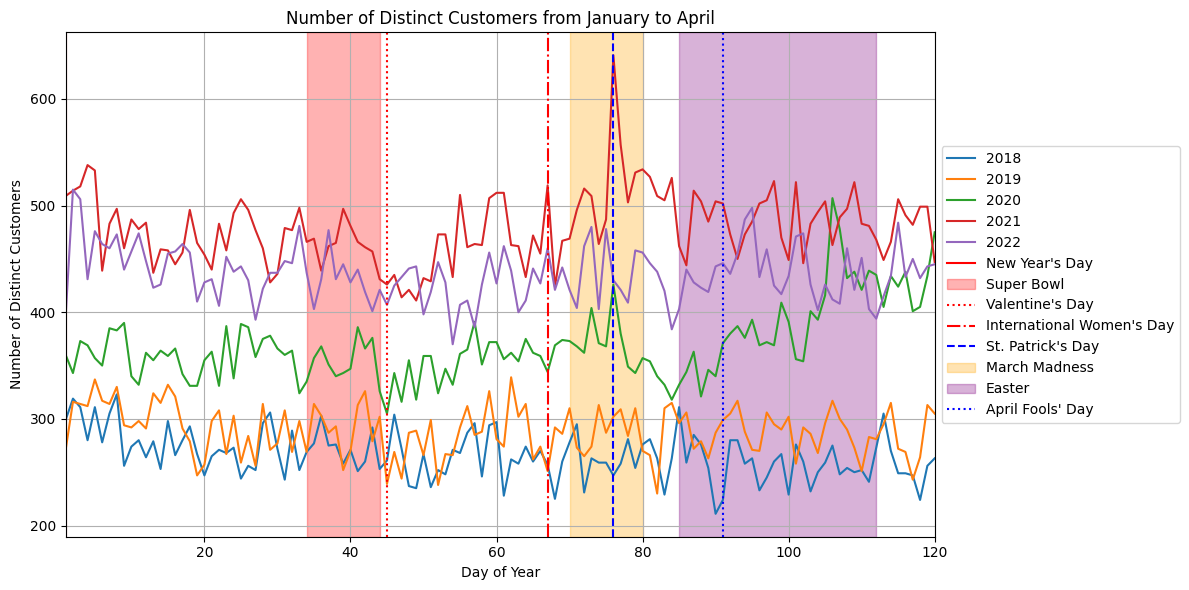

In [ ]:
plt.figure(figsize=(12, 6))

# Number of distinct customers from January to April
for year in purchases['year'].unique():
    yearly_data = purchases[purchases['year'] == year]
    customer_counts = yearly_data.groupby('day_of_year')['Survey ResponseID'].nunique()
    plt.plot(customer_counts.index[customer_counts.index <= 120],
             customer_counts.values[customer_counts.index <= 120], label=str(year))

# Vertical lines sale dates that do not vary by year
# Vertical highlighted regions for sale dates that varies by year
plt.axvline(1, color='red', linestyle='-', label="New Year's Day")
plt.axvspan(34, 44, color='red', alpha=0.3, label="Super Bowl")
plt.axvline(45, color='red', linestyle=':', label="Valentine's Day")
plt.axvline(67, color='red', linestyle='-.', label="International Women's Day")
plt.axvline(76, color='blue', linestyle='--', label="St. Patrick's Day")
plt.axvspan(70, 80, color='orange', alpha=0.3, label="March Madness")
plt.axvspan(85, 112, color='purple', alpha=0.3, label="Easter")
plt.axvline(91, color='blue', linestyle=':', label="April Fools' Day")

plt.xlim(1, 120)
plt.title('Number of Distinct Customers from January to April')
plt.xlabel('Day of Year')
plt.ylabel('Number of Distinct Customers')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


### May to August

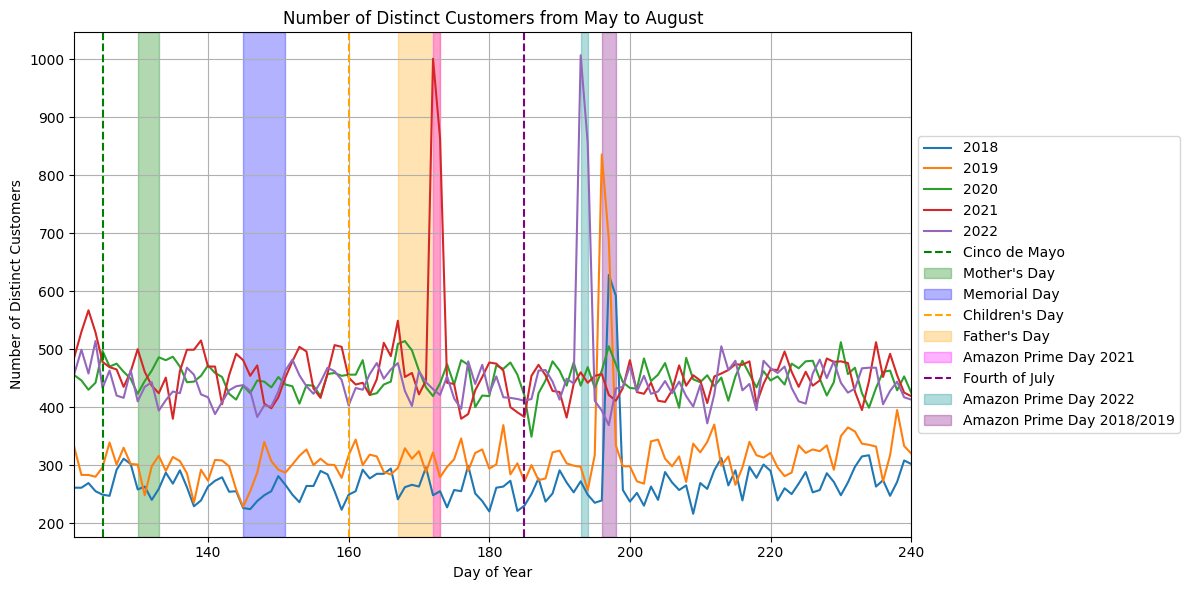

In [ ]:
plt.figure(figsize=(12, 6))

# Number of distinct customers from May to August
for year in purchases['year'].unique():
    yearly_data = purchases[purchases['year'] == year]
    customer_counts = yearly_data.groupby('day_of_year')['Survey ResponseID'].nunique()
    plt.plot(customer_counts.index[(customer_counts.index > 120) & (customer_counts.index <= 240)],
             customer_counts.values[(customer_counts.index > 120) & (customer_counts.index <= 240)], label=str(year))

# Vertical lines sale dates that do not vary by year
# Vertical highlighted regions for sale dates that varies by year
plt.axvline(125, color='green', linestyle='--', label="Cinco de Mayo")
plt.axvspan(130, 133, color='green', alpha=0.3, label="Mother's Day")
plt.axvspan(145, 151, color='blue', alpha=0.3, label="Memorial Day")
plt.axvline(160, color='orange', linestyle='--', label="Children's Day")
plt.axvspan(167, 173, color='orange', alpha=0.3, label="Father's Day")
plt.axvspan(172, 173, color='magenta', alpha=0.3, label="Amazon Prime Day 2021")
plt.axvline(185, color='purple', linestyle='--', label="Fourth of July")
plt.axvspan(193, 194, color='darkcyan', alpha=0.3, label="Amazon Prime Day 2022")
plt.axvspan(196, 198, color='purple', alpha=0.3, label="Amazon Prime Day 2018/2019")

plt.xlim(121, 240)
plt.title('Number of Distinct Customers from May to August')
plt.xlabel('Day of Year')
plt.ylabel('Number of Distinct Customers')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


### September to December

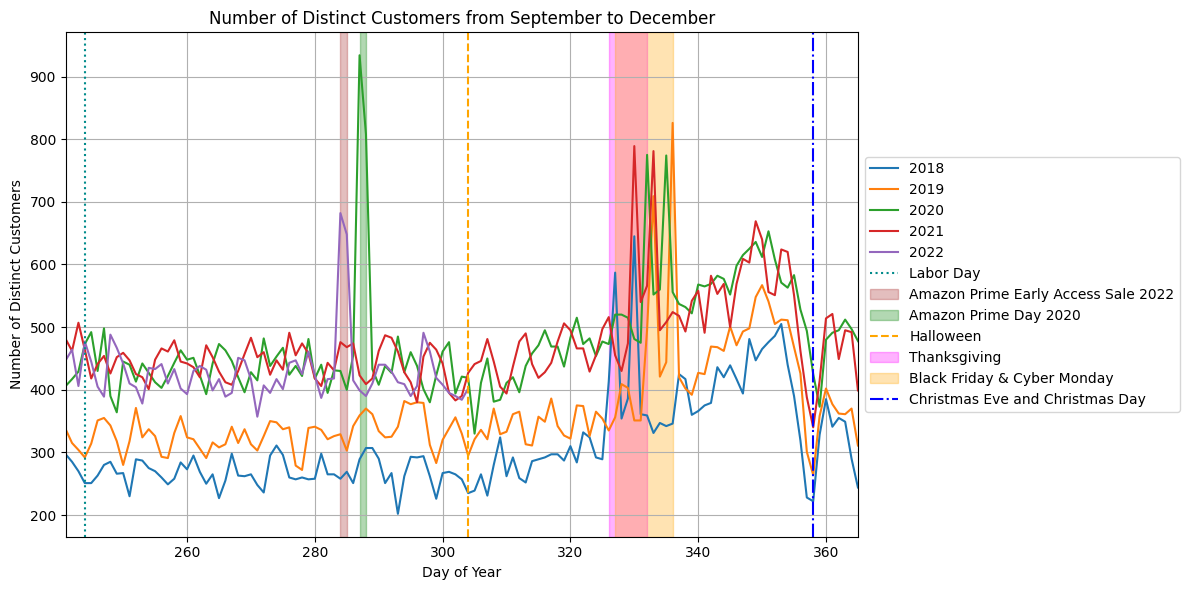

In [ ]:
plt.figure(figsize=(12, 6))

# Number of distinct customers from September to December
for year in purchases['year'].unique():
    yearly_data = purchases[purchases['year'] == year]
    customer_counts = yearly_data.groupby('day_of_year')['Survey ResponseID'].nunique()
    plt.plot(customer_counts.index[(customer_counts.index > 240)],
             customer_counts.values[(customer_counts.index > 240)], label=str(year))

# Vertical lines sale dates that do not vary by year
# Vertical highlighted regions for sale dates that varies by year
plt.axvline(244, color='darkcyan', linestyle=':', label="Labor Day")
plt.axvspan(284, 285, color='brown', alpha=0.3, label="Amazon Prime Early Access Sale 2022")
plt.axvspan(287, 288, color='green', alpha=0.3, label="Amazon Prime Day 2020")
plt.axvline(304, color='orange', linestyle='--', label="Halloween")
plt.axvspan(326, 332, color='magenta', alpha=0.3, label="Thanksgiving")
plt.axvspan(327, 336, color='orange', alpha=0.3, label="Black Friday & Cyber Monday")
plt.axvline(358, color='blue', linestyle='-.', label="Christmas Eve and Christmas Day")

plt.xlim(241, 365)
plt.title('Number of Distinct Customers from September to December')
plt.xlabel('Day of Year')
plt.ylabel('Number of Distinct Customers')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


### Conclusion

The spikes in number of purchases and number of customers generally coincide, indicating that there are an increased number of customers during those event periods, and not just increased quantity of purchase per customer

## Trends of customers coming back for events

For further analysis, we will check for customers that have not purchased items and churned that came back during events, focusing on Amazon Prime Day and Black Friday & Cyber Monday

### Black Friday & Cyber Monday

In [ ]:
black_friday_periods = {
    2018: {'black_friday': ('2018-11-23', '2018-11-26')},
    2019: {'black_friday': ('2019-11-29', '2019-12-02')},
    2020: {'black_friday': ('2020-11-27', '2020-11-30')},
    2021: {'black_friday': ('2021-11-26', '2021-11-29')}
}

results = []

for year, dates in black_friday_periods.items():
    start_date = pd.to_datetime(dates['black_friday'][0])
    end_date = pd.to_datetime(dates['black_friday'][1])
    event_duration_days = (end_date - start_date).days + 1

    sales_period_df = purchases[(purchases['Order Date'] >= start_date) & (purchases['Order Date'] <= end_date)]
    event_customers = sales_period_df['Survey ResponseID'].unique()

    num_returned_customers = 0

    for customer_id in event_customers:
        last_purchase_date = purchases[(purchases['Survey ResponseID'] == customer_id) &
                                        (purchases['Order Date'] < start_date)]['Order Date'].max()

        if last_purchase_date is not pd.NaT:
            months_since_last_purchase = (start_date - last_purchase_date).days / 30
            if months_since_last_purchase >= 2:
                num_returned_customers += 1

    num_total_customers = len(event_customers)

    avg_daily_returned_customers = num_returned_customers / event_duration_days
    avg_daily_total_customers = num_total_customers / event_duration_days
    avg_daily_proportion_returned = avg_daily_returned_customers / avg_daily_total_customers if avg_daily_total_customers > 0 else 0

    results.append({
        'Year': year,
        'Average daily returning customers': avg_daily_returned_customers,
        'Average daily total customers': avg_daily_total_customers,
        'Average daily proportion of returning customers': f"{avg_daily_proportion_returned:.2%}"
    })

results_df = pd.DataFrame(results)
results_df


,Year,Average daily returning customers,Average daily total customers,Average daily proportion of returning customers
0,2018,24.75,352.50,7.02%
1,2019,25.75,401.25,6.42%
2,2020,17.50,427.00,4.10%
3,2021,14.75,425.50,3.47%


In [ ]:
results_df['Average daily proportion of returning customers'] = (results_df['Average daily proportion of returning customers'].str.rstrip('%').astype(float) / 100)

average_daily_proportion = results_df['Average daily proportion of returning customers'].mean()

print(f"Average proportions across years: {average_daily_proportion:.2%}")

Average proportions across years: 5.25%


### Amazon Prime Day



In [ ]:
prime_day_periods = {
    2018: {'prime_day': ('2018-07-15', '2018-07-17')},
    2019: {'prime_day': ('2019-07-15', '2019-07-17')},
    2020: {'prime_day': ('2020-10-13', '2020-10-14')},
    2021: {'prime_day': ('2021-06-21', '2021-06-22')},
    2022: {'prime_day_july': ('2022-07-12', '2022-07-13'),
           'prime_early_access': ('2022-10-11', '2022-10-12')
    }
}

results = []

for year, events in prime_day_periods.items():
    for event, (start_date_str, end_date_str) in events.items():
        start_date = pd.to_datetime(start_date_str)
        end_date = pd.to_datetime(end_date_str)
        event_duration_days = (end_date - start_date).days + 1

        sales_period_df = purchases[(purchases['Order Date'] >= start_date) & (purchases['Order Date'] <= end_date)]
        event_customers = sales_period_df['Survey ResponseID'].unique()

        num_returned_customers = 0

        for customer_id in event_customers:
            last_purchase_date = purchases[(purchases['Survey ResponseID'] == customer_id) &
                                           (purchases['Order Date'] < start_date)]['Order Date'].max()

            if last_purchase_date is not pd.NaT:
                months_since_last_purchase = (start_date - last_purchase_date).days / 30
                if months_since_last_purchase >= 2:
                    num_returned_customers += 1

        num_total_customers = len(event_customers)

        avg_daily_returned_customers = num_returned_customers / event_duration_days
        avg_daily_total_customers = num_total_customers / event_duration_days
        avg_daily_proportion_returned = avg_daily_returned_customers / avg_daily_total_customers if avg_daily_total_customers > 0 else 0

        results.append({
            'Year': year,
            'Event': event,
            'Average daily returning customers': avg_daily_returned_customers,
            'Average daily total customers': avg_daily_total_customers,
            'Average daily proportion of returning customers': f"{avg_daily_proportion_returned:.2%}"
        })

results_df = pd.DataFrame(results)
results_df


,Year,Event,Average daily returning customers,Average daily total customers,Average daily proportion of returning customers
0,2018,prime_day,14.000000,366.000000,3.83%
1,2019,prime_day,17.666667,428.666667,4.12%
2,2020,prime_day,16.000000,621.500000,2.57%
3,2021,prime_day,14.000000,643.000000,2.18%
4,2022,prime_day_july,14.500000,589.000000,2.46%
5,2022,prime_early_access,9.500000,445.000000,2.13%


In [ ]:
results_df['Average daily proportion of returning customers'] = (results_df['Average daily proportion of returning customers'].str.rstrip('%').astype(float) / 100)

average_daily_proportion = results_df['Average daily proportion of returning customers'].mean()

print(f"Average proportions across years: {average_daily_proportion:.2%}")

Average proportions across years: 2.88%


Makes more sense for proportion of returning customers to be lower for Prime Day as the discounts require buying Amazon Prime. More likely that only the more frequent buyers will purchase it.

For a better understand to see how the proportion of returning customers differs from the norm, we will analyse the proportions of returning customers in a few events that did not have a significant increase in number of purchases.

We have chosen the events, Valentine's Day, Mother's Day, Memorial Day, Halloween and Christmas Eve/Day.

### Valentine's Day, Mother's Day, Memorial Day, Halloween and Christmas Eve/Day

In [ ]:
holiday_periods = {
    2018: {
        'valentines_day': ('2018-02-14', '2018-02-14'),
        'mothers_day': ('2018-05-08', '2018-05-13'),
        'memorial_day': ('2018-05-25', '2018-05-31'),
        'halloween': ('2018-10-31', '2018-10-31'),
        'christmas': ('2018-12-24', '2018-12-25')
    },
    2019: {
        'valentines_day': ('2019-02-14', '2019-02-14'),
        'mothers_day': ('2019-05-07', '2019-05-12'),
        'memorial_day': ('2019-05-24', '2019-05-30'),
        'halloween': ('2019-10-31', '2019-10-31'),
        'christmas': ('2019-12-24', '2019-12-25')
    },
    2020: {
        'valentines_day': ('2020-02-14', '2020-02-14'),
        'mothers_day': ('2020-05-05', '2020-05-10'),
        'memorial_day': ('2020-05-23', '2020-05-29'),
        'halloween': ('2020-10-31', '2020-10-31'),
        'christmas': ('2020-12-24', '2020-12-25')
    },
    2021: {
        'valentines_day': ('2021-02-14', '2021-02-14'),
        'mothers_day': ('2021-05-04', '2021-05-09'),
        'memorial_day': ('2021-05-22', '2021-05-28'),
        'halloween': ('2021-10-31', '2021-10-31'),
        'christmas': ('2021-12-24', '2021-12-25')
    },
    2022: {
        'valentines_day': ('2022-02-14', '2022-02-14'),
        'mothers_day': ('2022-05-03', '2022-05-08'),
        'memorial_day': ('2022-05-21', '2022-05-27'),
        'halloween': ('2022-10-31', '2022-10-31'),
        'christmas': ('2022-12-24', '2022-12-25')
    }
}

results = []

for year, events in holiday_periods.items():
    for event, (start_date_str, end_date_str) in events.items():
        start_date = pd.to_datetime(start_date_str)
        end_date = pd.to_datetime(end_date_str)
        event_duration_days = (end_date - start_date).days + 1
        sales_period_df = purchases[(purchases['Order Date'] >= start_date) & (purchases['Order Date'] <= end_date)]
        event_customers = sales_period_df['Survey ResponseID'].unique()

        num_returned_customers = 0

        for customer_id in event_customers:
            last_purchase_date = purchases[(purchases['Survey ResponseID'] == customer_id) &
                                           (purchases['Order Date'] < start_date)]['Order Date'].max()

            if last_purchase_date is not pd.NaT:
                months_since_last_purchase = (start_date - last_purchase_date).days / 30
                if months_since_last_purchase >= 2:
                    num_returned_customers += 1

        num_total_customers = len(event_customers)

        avg_daily_returned_customers = num_returned_customers / event_duration_days
        avg_daily_total_customers = num_total_customers / event_duration_days
        avg_daily_proportion_returned = avg_daily_returned_customers / avg_daily_total_customers if avg_daily_total_customers > 0 else 0

        results.append({
            'Year': year,
            'Event': event,
            'Average daily returning customer': avg_daily_returned_customers,
            'Average daily total customers': avg_daily_total_customers,
            'Average daily proportion of returning customers': f"{avg_daily_proportion_returned:.2%}"
        })

results_df = pd.DataFrame(results)
results_df


,Year,Event,Average daily returning customer,Average daily total customers,Average daily proportion of returning customers
0,2018,valentines_day,0.000000,261.000000,0.00%
1,2018,mothers_day,7.333333,195.833333,3.74%
2,2018,memorial_day,7.000000,169.714286,4.12%
3,2018,halloween,10.000000,241.000000,4.15%
4,2018,christmas,13.500000,262.500000,5.14%
5,2019,valentines_day,7.000000,261.000000,2.68%
6,2019,mothers_day,15.333333,217.833333,7.04%
7,2019,memorial_day,9.000000,197.714286,4.55%
8,2019,halloween,11.000000,314.000000,3.50%
9,2019,christmas,9.000000,305.000000,2.95%


In [ ]:
results_df['Average daily proportion of returning customers'] = (results_df['Average daily proportion of returning customers'].str.rstrip('%').astype(float) / 100)

average_daily_proportion = results_df['Average daily proportion of returning customers'].mean()

print(f"Average proportions across years: {average_daily_proportion:.2%}")

Average proportions across years: 2.94%


### Conclusion

Black Friday & Cyber Monday sales are the most effective retention strategy when comparing by the general customer returning rates. Whereas for Amazon Prime Day, it actually has less returning customers compared to less significant sales dates. This can be reasoned due to most of the sales during Amazon Prime Day being for Prime members only. For a customer to be a Prime member, they are more likely to be active customers as it is a monthly fee, and customers that just came back to Amazon will likely not have Prime yet, until they think the subscription costs are justified, such as when they know they will purchase more on Amazon in general.

## Return customer types for Black Friday and Cyber Monday

In [ ]:
black_friday_periods = {
    2018: {'black_friday': ('2018-11-23', '2018-11-26')},
    2019: {'black_friday': ('2019-11-29', '2019-12-02')},
    2020: {'black_friday': ('2020-11-27', '2020-11-30')},
    2021: {'black_friday': ('2021-11-26', '2021-11-29')},
    2022: {'black_friday': ('2022-11-25', '2022-11-28')}
}

returning_customers = []

for year, dates in black_friday_periods.items():
    start_date = pd.to_datetime(dates['black_friday'][0])
    end_date = pd.to_datetime(dates['black_friday'][1])

    sales_period_df = purchases[(purchases['Order Date'] >= start_date) & (purchases['Order Date'] <= end_date)]
    event_customers = sales_period_df['Survey ResponseID'].unique()

    for customer_id in event_customers:
        last_purchase_date = purchases[(purchases['Survey ResponseID'] == customer_id) &
                                       (purchases['Order Date'] < start_date)]['Order Date'].max()

        if last_purchase_date is not pd.NaT:
            months_since_last_purchase = (start_date - last_purchase_date).days / 30
            if months_since_last_purchase >= 2:
                returning_customers.append({
                    'Year': year,
                    'Survey ResponseID': customer_id
                })

returning_customers_df = pd.DataFrame(returning_customers)
returning_customers_df


,Year,Survey ResponseID
0,2018,R_0BrMxYYMHVMOBEJ
1,2018,R_0exEFdj5YTDEgqB
2,2018,R_111J2YLIGckNIeJ
3,2018,R_1C8t1JAe5Wo7sSl
4,2018,R_1E0ZZlhukNsNc7w
...,...,...
326,2021,R_eqVPFWs6xsOSTeh
327,2021,R_pM2zj7XA5ai0mgF
328,2021,R_umkBztpJiFIRkxX
329,2021,R_vMtYQrockCOY7g5


In [ ]:
# file_path = '/content/drive/My Drive/dsa3101/returning_customers.csv'

# returning_customers_df.to_csv(file_path, index=False)

# print(f"DataFrame saved to: {file_path}")

In [ ]:
file_id = '1zELufbYW9YWq_RU7xOLWfs06bAnm73lA'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'returning_customers.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1zELufbYW9YWq_RU7xOLWfs06bAnm73lA
To: /content/returning_customers.csv
100%|██████████| 7.64k/7.64k [00:00<00:00, 14.7MB/s]


'returning_customers.csv'

In [ ]:
returning_customers = pd.read_csv('returning_customers.csv')
returning_customers

,Year,Survey ResponseID
0,2018,R_0BrMxYYMHVMOBEJ
1,2018,R_0exEFdj5YTDEgqB
2,2018,R_111J2YLIGckNIeJ
3,2018,R_1C8t1JAe5Wo7sSl
4,2018,R_1E0ZZlhukNsNc7w
...,...,...
326,2021,R_eqVPFWs6xsOSTeh
327,2021,R_pM2zj7XA5ai0mgF
328,2021,R_umkBztpJiFIRkxX
329,2021,R_vMtYQrockCOY7g5


In [ ]:
# remove year col and duplicate IDs
returning_customers = returning_customers.drop(columns=['Year']).drop_duplicates(subset=['Survey ResponseID'])
returning_customers.head()

,Survey ResponseID
0,R_0BrMxYYMHVMOBEJ
1,R_0exEFdj5YTDEgqB
2,R_111J2YLIGckNIeJ
3,R_1C8t1JAe5Wo7sSl
4,R_1E0ZZlhukNsNc7w


In [ ]:
customers.head()

,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,...,Pct Discount,Category,Cat_Urgency,Cat_Impulse,Cat_Indecisive,Cat_Category,Cat_Discount,Cat_Engagement,Cat_High_Value_F,Cat_High_Value_M
0,R_03aEbghUILs9NxD,1,1,0.000000,0.037819,0.000000,0.000000,0.000000,0.000000,1.0,...,0.562500,NaN,0,1,0,0,1,1,0,0
1,R_06RZP9pS7kONINr,1,1,0.073157,0.028239,0.000000,0.050699,0.000000,0.030436,1.0,...,0.458128,NaN,0,0,0,0,1,1,0,1
2,R_085qq7w0pkhowox,1,1,0.000000,0.000000,0.000000,0.000000,0.065627,0.000000,1.0,...,0.454861,NaN,0,0,0,0,1,1,0,0
3,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.072766,0.000000,0.000000,0.000000,1.0,...,0.382022,NaN,0,1,0,0,0,1,0,1
4,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.000000,0.036028,0.000000,0.000000,1.0,...,0.380952,NaN,0,1,0,0,0,1,0,0


In [ ]:
merged_df = returning_customers.merge(customers, on='Survey ResponseID', how='left')

segment_sums = merged_df[['Cat_Urgency', 'Cat_Impulse', 'Cat_Indecisive',
                          'Cat_Category', 'Cat_Discount', 'Cat_Engagement',
                          'Cat_High_Value_F', 'Cat_High_Value_M']].sum()

total_returning_customers = len(merged_df)

segment_percentages = ((segment_sums / total_returning_customers) * 100).round(2)

print("Total Returning Customers:", total_returning_customers)
print("For returning customers, the sum of each customer segment is as follows:\n", segment_sums)
print("In percentages (2 d.p.):\n", segment_percentages)

Total Returning Customers: 314
For returning customers, the sum of each customer segment is as follows:
 Cat_Urgency          38
Cat_Impulse         136
Cat_Indecisive       32
Cat_Category         29
Cat_Discount        251
Cat_Engagement      282
Cat_High_Value_F      6
Cat_High_Value_M    100
dtype: int64
In percentages (2 d.p.):
 Cat_Urgency         12.10
Cat_Impulse         43.31
Cat_Indecisive      10.19
Cat_Category         9.24
Cat_Discount        79.94
Cat_Engagement      89.81
Cat_High_Value_F     1.91
Cat_High_Value_M    31.85
dtype: float64


## Trends on discount usage

### Sales dates
Used a lot in code below, compiled for clarity

In [ ]:
# event date ranges
sales_dates = [
    ('2021-06-21', '2021-06-22'),  # Amazon Prime Day 2021
    ('2022-07-12', '2022-07-13'),  # Amazon Prime Day 2022
    ('2018-07-15', '2018-07-17'),  # Amazon Prime Day 2018
    ('2019-07-15', '2019-07-17'),  # Amazon Prime Day 2019
    ('2022-10-11', '2022-10-12'),  # Amazon Prime Early Access Sale 2022
    ('2020-10-13', '2020-10-14'),  # Amazon Prime Day 2020
    ('2018-11-24', '2018-12-02'),  # Black Friday & Cyber Monday
    ('2019-11-24', '2019-12-02'),
    ('2020-11-24', '2020-12-02'),
    ('2021-11-24', '2021-12-02'),
    ('2022-11-24', '2022-12-02')
]

### Proportion of purchases that used discounts on event and non-event days

In [ ]:
event_ranges = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in sales_dates]

event_days = purchases[purchases['Order Date'].apply(
    lambda x: any(start <= x <= end for start, end in event_ranges)
)]

discounted_count = 0
non_discounted_count = 0

for i, row in event_days.iterrows():
    if row['Discounts'] > 0:
        discounted_count += 1
    else:
        non_discounted_count += 1

total_purchases_event_days = discounted_count + non_discounted_count
discount_proportion_event_days = (discounted_count / total_purchases_event_days) * 100
non_discount_proportion_event_days = (non_discounted_count / total_purchases_event_days) * 100

print("EVENT DAYS")
print(f"Total purchases: {total_purchases_event_days}")
print(f"Discounted purchases: {discounted_count}")
print(f"Non-discounted purchases: {non_discounted_count}")
print(f"Proportion of purchases with discounts: {discount_proportion_event_days:.2f}%")
print(f"Proportion of purchases without discounts: {non_discount_proportion_event_days:.2f}%")


EVENT DAYS
Total purchases: 77432
Discounted purchases: 62074
Non-discounted purchases: 15358
Proportion of purchases with discounts: 80.17%
Proportion of purchases without discounts: 19.83%


In [ ]:
non_event_days = purchases[~purchases['Order Date'].apply(
    lambda x: any(start <= x <= end for start, end in event_ranges)
)]

discounted_count_non_event = 0
non_discounted_count_non_event = 0

for i, row in non_event_days.iterrows():
    if row['Discounts'] > 0:
        discounted_count_non_event += 1
    else:
        non_discounted_count_non_event += 1

total_purchases_non_event_days = discounted_count_non_event + non_discounted_count_non_event

discount_proportion_non_event_days = (discounted_count_non_event / total_purchases_non_event_days) * 100
non_discount_proportion_non_event_days = (non_discounted_count_non_event / total_purchases_non_event_days) * 100

print("NON-EVENT DAYS")
print(f"Total purchases: {total_purchases_non_event_days}")
print(f"Discounted purchases: {discounted_count_non_event}")
print(f"Non-discounted purchases: {non_discounted_count_non_event}")
print(f"Proportion of purchases with discounts: {discount_proportion_non_event_days:.2f}%")
print(f"Proportion of purchases without discounts: {non_discount_proportion_non_event_days:.2f}%")


NON-EVENT DAYS
Total purchases: 1453331
Discounted purchases: 580631
Non-discounted purchases: 872700
Proportion of purchases with discounts: 39.95%
Proportion of purchases without discounts: 60.05%


### Discount distributions

In [ ]:
# get all discount variations for event days
event_days = []
for start, end in sales_dates:
    event_days.extend(pd.date_range(start=start, end=end))

event_purchases = purchases[purchases['Order Date'].isin(event_days)]
event_discounts = event_purchases['Discounts'].unique()
event_discounts.sort()

print("Unique discount amounts during event days:", event_discounts)


Unique discount amounts during event days: [0.   0.3  0.35 0.4  0.45 0.5 ]


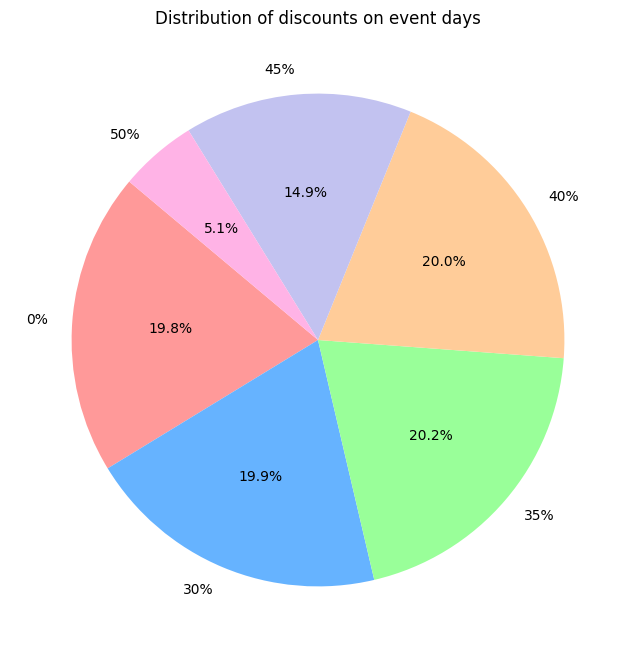

In [ ]:
# visualise distribution in piechart
discount_levels = [0, 0.3, 0.35, 0.4, 0.45, 0.5]
event_purchases_filtered = event_purchases[event_purchases['Discounts'].isin(discount_levels)]

discount_counts = event_purchases_filtered['Discounts'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(discount_counts, labels=[f'{int(d*100)}%' for d in discount_counts.index], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title('Distribution of discounts on event days')
plt.show()


In [ ]:
# get all discount variations for non event days
event_days = []
for start, end in sales_dates:
    event_days.extend(pd.date_range(start=start, end=end))

event_days = set(event_days)

nonevent_purchases = purchases[~purchases['Order Date'].isin(event_days)]
nonevent_discounts = nonevent_purchases['Discounts'].unique()
nonevent_discounts.sort()

print("Unique discount amounts during non event days:", nonevent_discounts)


Unique discount amounts during non event days: [0.   0.05 0.1  0.15 0.2 ]


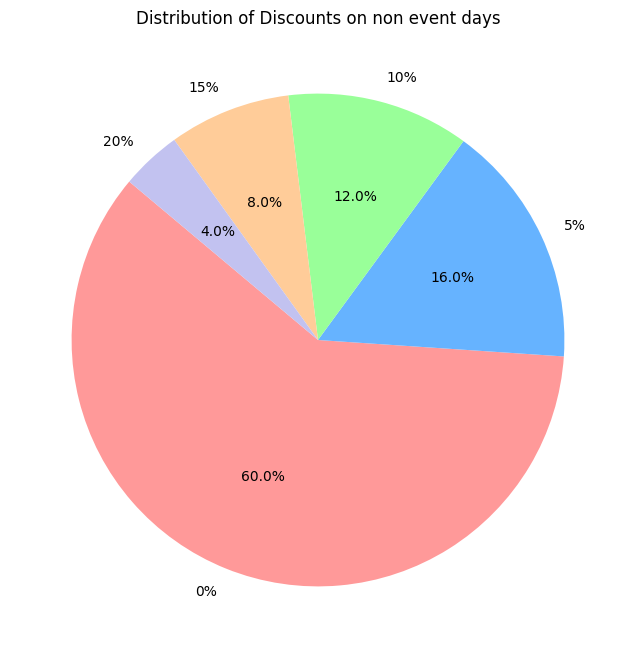

In [ ]:
# visualise distribution in piechart
discount_counts_normal_days = nonevent_purchases['Discounts'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(discount_counts_normal_days, labels=[f'{int(d*100)}%' for d in discount_counts_normal_days.index], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title('Distribution of Discounts on non event days')
plt.show()

### Conclusion

Sales days have greater quantity of purchases using discounts, even more so using larger discounts.   

This could be seen in the piecharts, for instance showed that for non event days 60% of purchases are bought without discounts, whereas for sales dates only 20% of purchases are bought without discounts.  

For normal non event days the discounts range from 5%, 10%, 15% and 20%, whereas for sales days the discounts range from 30%, 35%, 40%, 45% and 50%

## Prime Day and its correlation with Prime members

Since it was hypothesised above that there is a lower proportion of returning customers for Amazon Prime Day due to most of its discounts being locked behind a Prime membership. Now we check how many of all purchases are actually bought by Prime members during those prime event periods, to support our theory.

In [ ]:
# prime date ranges
prime_dates = [
    ('2018-07-15', '2018-07-17'),  # Amazon Prime Day 2018
    ('2019-07-15', '2019-07-17'),  # Amazon Prime Day 2019
    ('2020-10-13', '2020-10-14'),  # Amazon Prime Day 2020
    ('2021-06-21', '2021-06-22'),  # Amazon Prime Day 2021
    ('2022-07-12', '2022-07-13'),  # Amazon Prime Day 2022
    ('2022-10-11', '2022-10-12'),  # Amazon Prime Early Access Sale 2022
]

prime_event_days = []
for start, end in prime_dates:
    prime_event_days.extend(pd.date_range(start=start, end=end))

prime_event_days = set(prime_event_days)

prime_event_purchases = purchases[purchases['Order Date'].isin(prime_event_days)]
prime_percentage = prime_event_purchases['Prime'].mean() * 100

print(f"Percentage of purchases from Prime members during Prime event days: {prime_percentage:.2f}%")

Percentage of purchases from Prime members during Prime event days: 93.43%


A large majority of purchases were by Prime members during Amazon Prime Day periods, which supports our hypothesis

In [ ]:
customers

## Prime continuation rate after trial

In [ ]:
customers

,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,...,Pct Discount,Category,Cat_Urgency,Cat_Impulse,Cat_Indecisive,Cat_Category,Cat_Discount,Cat_Engagement,Cat_High_Value_F,Cat_High_Value_M
0,R_03aEbghUILs9NxD,1,1,0.000000,0.037819,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.562500,NaN,0,1,0,0,1,1,0,0
1,R_06RZP9pS7kONINr,1,1,0.073157,0.028239,0.000000,0.050699,0.000000,0.030436,1.000000,...,0.458128,NaN,0,0,0,0,1,1,0,1
2,R_085qq7w0pkhowox,1,1,0.000000,0.000000,0.000000,0.000000,0.065627,0.000000,1.000000,...,0.454861,NaN,0,0,0,0,1,1,0,0
3,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.072766,0.000000,0.000000,0.000000,1.000000,...,0.382022,NaN,0,1,0,0,0,1,0,1
4,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.000000,0.036028,0.000000,0.000000,1.000000,...,0.380952,NaN,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,R_z3emF7IfAc3UqYx,1,1,0.000000,0.000000,0.000000,0.000000,0.038472,0.000000,1.000000,...,0.397516,NaN,0,0,0,0,0,1,0,0
4919,R_z6D1T2MULlDlLAB,0,1,0.215337,0.000000,0.000000,0.000000,0.000000,0.043703,0.420290,...,0.368421,NaN,0,0,0,0,0,1,0,0
4920,R_z89cVoCKmGUboYN,0,1,0.094698,0.022205,0.078850,0.000000,0.000000,0.040143,0.500000,...,0.545455,Books,0,0,0,1,1,1,0,0
4921,R_z8w9TsEywvOcfCN,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.492308,...,0.457317,NaN,0,0,0,0,1,0,0,1


In [ ]:
# those who had trial
trial_users = customers[customers['Free Trial'] == 1]

# find proportion of those who are still prime now, assuming that the free trial has already ended
continued_prime_count = trial_users[trial_users['Prime'] == 1].shape[0]
total_trial_users = trial_users.shape[0]
continuation_rate = (continued_prime_count / total_trial_users) * 100

print(f"Prime continuation rate: {continuation_rate:.2f}%")

Prime continuation rate: 72.63%
